# Project 1: SAT SCORES IN THE US

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data describes by state the participation of the students(how many students took the test out of the total amount of students that graduated), as well as the average score for the verbal and math sections of the exam.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

Looking at the data, there are no missing values and the data itself makes sense.

In [22]:
!pwd

/Users/jb3/DSI Students/CarlosVallecilla/Curriculum/Projects/Notebooks


## Step 2: Load the data.

#####  Load the data into a list of lists

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

datacsv = '../Assets/Project 1/sat_scores.csv'

data = []


with open(datacsv, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row) #This adds the rows (string format) in the csv file to data list.

##### Print the data

In [2]:
data

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### Extract a list of the labels from the data, and remove them from the data.

In [3]:
header = data[0] #selects the first row which are the labels
data = data[1:]  #removes the labels
print header

['State', 'Rate', 'Verbal', 'Math']


##### Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [4]:
stateNames = [r.pop(0) for r in data] #takes the first row and removes it from data
print stateNames

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### Print the types of each column

In [9]:
print type(stateNames[0])
print type(stateNames[1])
print type(stateNames[2])
print type(stateNames[3])
print type(data[1])

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'list'>


##### Do any types need to be reassigned? If so, go ahead and do it.

In [6]:
data1 = [[int(float(j)) for j in i] for i in data] #since it is a list of lists two for loops are necessary
data1

#JB use straight 'int' in this case for SAT scores since you can't get fractional scores. Float is an argument for rate only.

[[82, 509, 510],
 [81, 499, 513],
 [79, 511, 515],
 [77, 495, 505],
 [72, 520, 516],
 [71, 501, 499],
 [71, 500, 499],
 [69, 511, 506],
 [69, 506, 500],
 [68, 510, 501],
 [67, 501, 499],
 [65, 508, 510],
 [65, 493, 499],
 [63, 491, 489],
 [60, 499, 501],
 [57, 486, 488],
 [56, 482, 474],
 [55, 526, 526],
 [54, 498, 499],
 [53, 527, 527],
 [53, 493, 499],
 [52, 485, 515],
 [51, 514, 510],
 [51, 498, 517],
 [34, 523, 525],
 [33, 509, 515],
 [31, 539, 542],
 [26, 534, 439],
 [23, 539, 539],
 [18, 527, 512],
 [17, 543, 542],
 [13, 562, 553],
 [13, 551, 542],
 [12, 576, 589],
 [12, 550, 550],
 [11, 547, 545],
 [11, 561, 572],
 [9, 580, 589],
 [9, 577, 580],
 [9, 559, 554],
 [8, 562, 568],
 [8, 567, 561],
 [8, 577, 577],
 [7, 564, 562],
 [6, 584, 596],
 [6, 562, 550],
 [5, 575, 570],
 [5, 593, 603],
 [4, 577, 582],
 [4, 592, 599],
 [4, 566, 551],
 [45, 506, 514]]

## Step 3: Describe the data

In [11]:
totalRow=data1[-1] #creates a list for the total values #JB this pulls only the last row; what do you want todo with it?
data2=data1[:51] # makes a list without total values

rateCol=[r.pop(0) for r in data2] #removes the first column and assigns it to rateCol
verbalCol=[r.pop(0) for r in data2] #removes the first column and assigns it to verbalCol
mathCol=[r.pop(0) for r in data2] ##removes the first column and assigns it to mathCol

##### Print the min and max of each column

In [12]:
print 'Rate: The max is %d and the min is %d' %(max(rateCol), min(rateCol))

print 'Verbal: The max is %d and the min is %d' %(max(verbalCol), min(verbalCol))

print 'Math: The max is %d and the min is %d' %(max(mathCol), min(mathCol))

#JB good!

Rate: The max is 82 and the min is 4
Verbal: The max is 593 and the min is 482
Math: The max is 603 and the min is 439


##### Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [13]:
def stdev(nums):
    cnt = len(nums)
    avg = float(sum(nums))/cnt
    return (sum((x-avg)**2.0 for x in nums)/(cnt-1))**0.5
print "The Standard Deviation of Rate is: %r"%(stdev(rateCol))#%r for raw number #np.std(rateCol,ddof=1)
print "The Standard Deviation of Verbal is: %r"%(stdev(verbalCol))#np.std(verbalCol,ddof=1)
print "The Standard Deviation of Math is: %r"%(stdev(mathCol))#np.std(mathCol,ddof=1)

The Standard Deviation of Rate is: 27.550680572356104
The Standard Deviation of Verbal is: 33.360667224248665
The Standard Deviation of Math is: 36.28739315465888


## Step 4: Visualize the data

##### Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

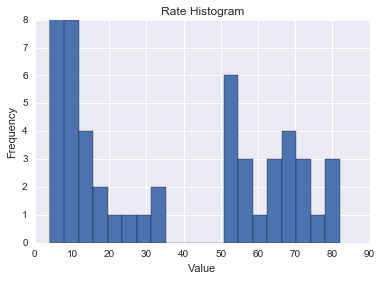

In [14]:
import matplotlib.pyplot as plt

plt.hist(rateCol,bins=20)
plt.title("Rate Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")


plt.show()

##### Plot the Math distribution

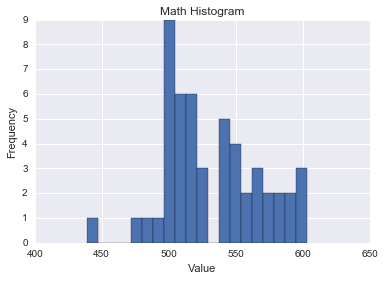

In [15]:
plt.hist(mathCol,bins=20)
plt.title("Math Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")


plt.show()

##### Plot the Verbal distribution

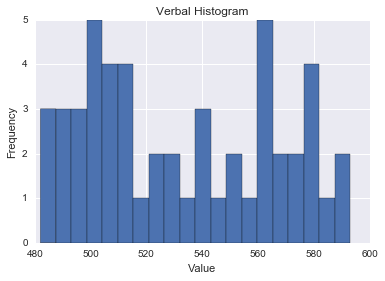

In [16]:
plt.hist(verbalCol,bins=20)
plt.title("Verbal Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")


plt.show()

##### What is the typical assumption for data distribution?

The typical assumption is that it is normaly distributed

##### Does that distribution hold true for our data?

For the math data one can see it is similar to a normal distribution, but both verbal and rate are not.

##### Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

Scatterplots for Rate vs Math and Verbal scores


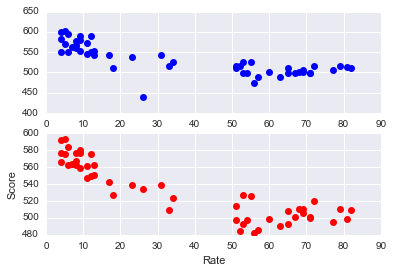

In [17]:
print "Scatterplots for Rate vs Math and Verbal scores"
plt.figure(1)



plt.subplot(211)
plt.plot(rateCol, mathCol, 'bo',)

plt.subplot(212)
plt.plot(rateCol, verbalCol, 'ro')

plt.xlabel('Rate')
plt.ylabel('Score')


plt.show()



##### 20. Are there any interesting relationships to note?

Yes, as the rate of participation in the exam gets lower the scores tend to be higher. This can be explained by the quality of students that take the exam. In those states were the participation is low, only the best students tend to take the exams. If only the best students take the exams, the average scores are going to be higher than in those states where there are good and bad scoring students.

##### Create box plots for each variable. 

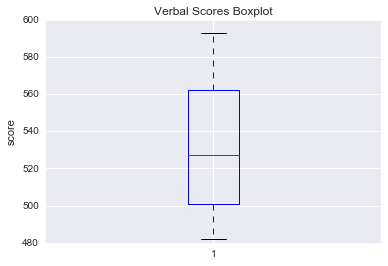

In [18]:
plt.boxplot(verbalCol)

plt.ylabel('score')
plt.title('Verbal Scores Boxplot')
plt.show()

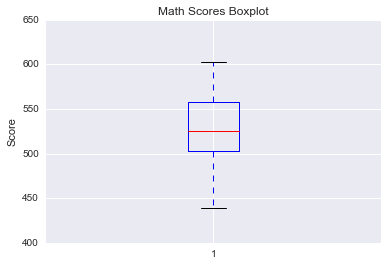

In [19]:
plt.boxplot(mathCol)

plt.ylabel('Score')
plt.title('Math Scores Boxplot')
plt.show()

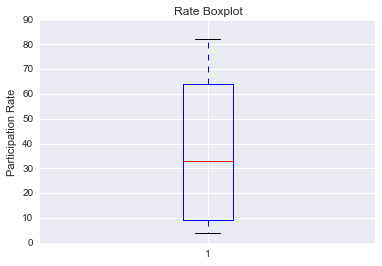

In [20]:
plt.boxplot(rateCol)

plt.ylabel('Participation Rate')
plt.title('Rate Boxplot')
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

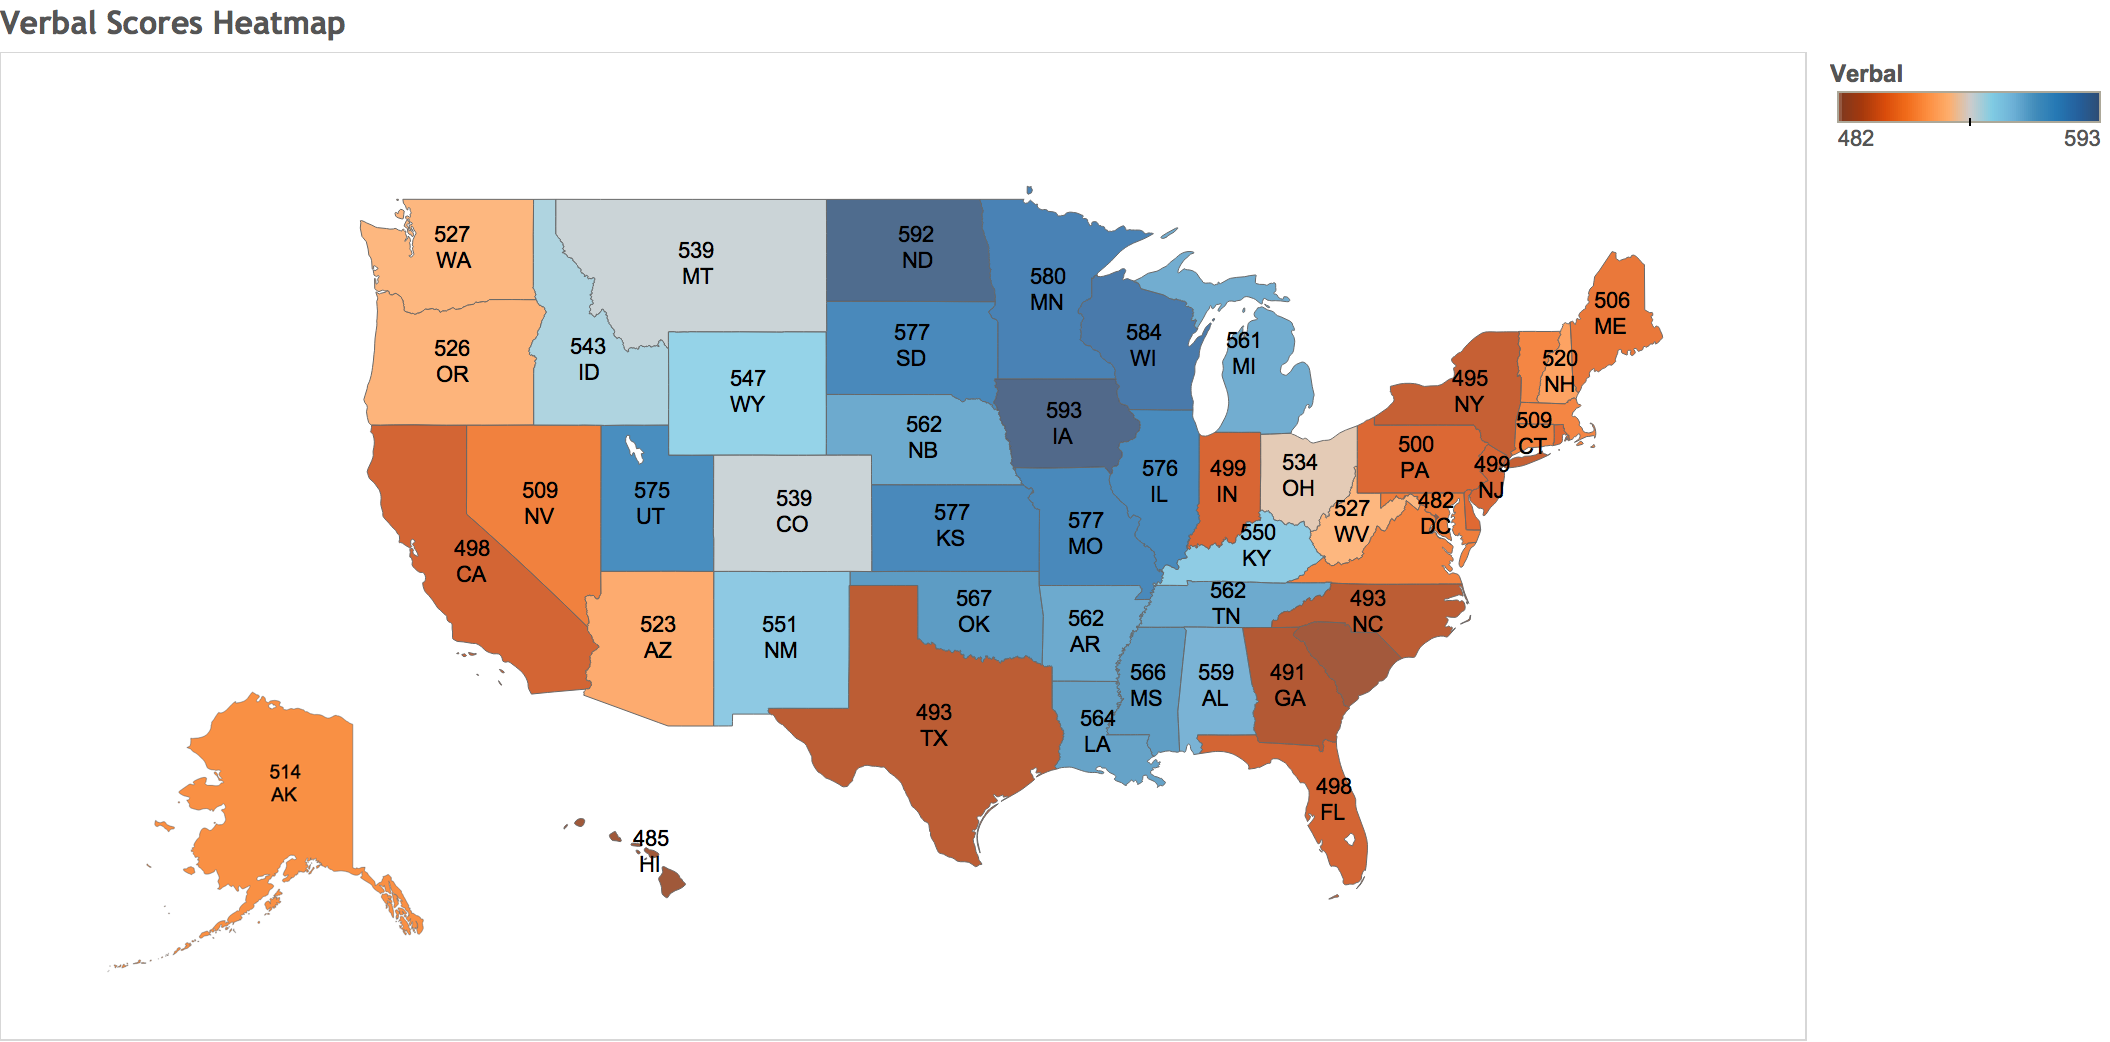

In [21]:
from IPython.display import Image
PATH = "../Assets/Project 1/"

Image(filename = PATH + "Verbal.png", width=1000, height=1000)

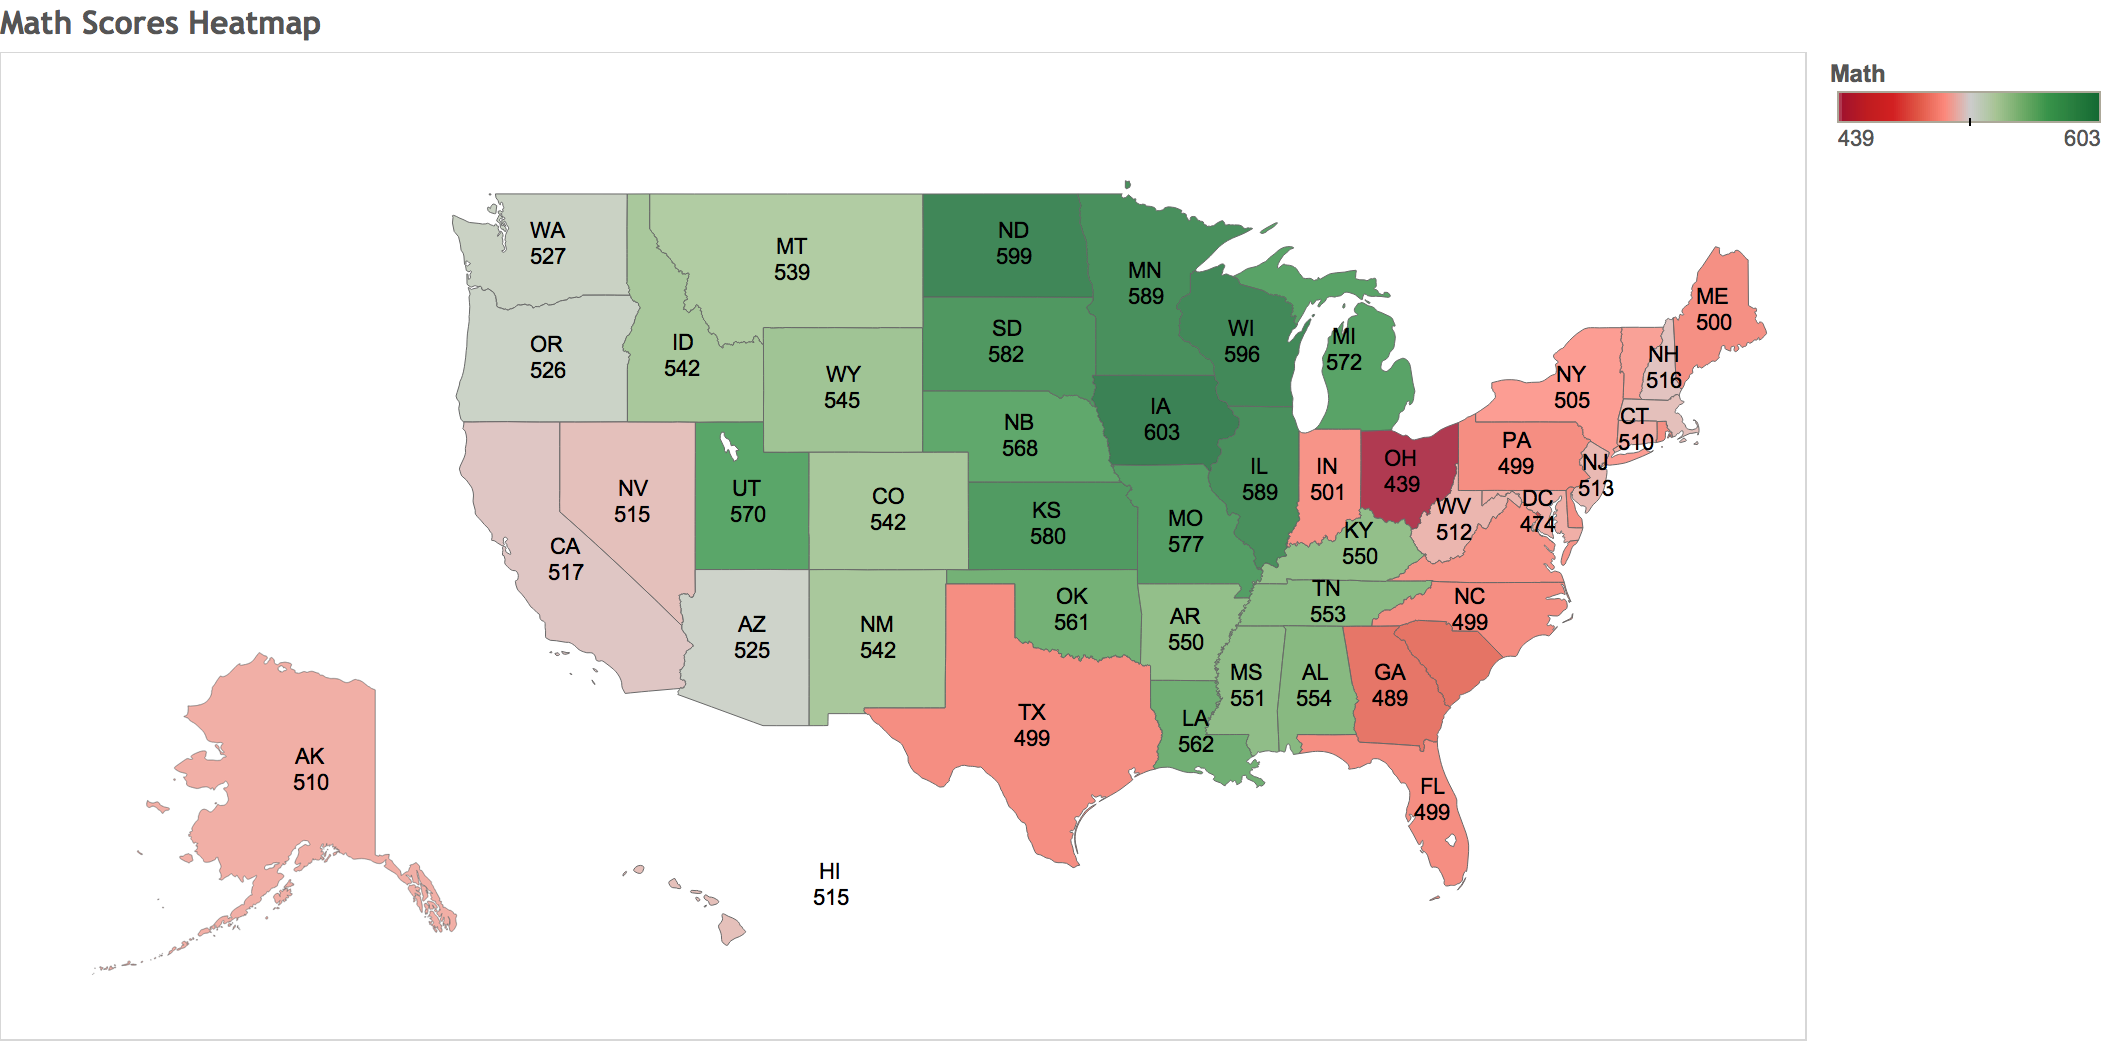

In [22]:
Image(filename = PATH + "Math.png", width=1000, height=1000)